# ***Workshop 2D Robot Kinematic and Dynamic***

In [ ]:
import math

from numpy.matlib import matrix,rand,zeros,ones,empty,eye
import numpy.matlib as M

import numpy as np
import numpy.matlib as ml
from numpy import linalg as LA
import matplotlib.pyplot as plt
import numpy.random as rnd
from matplotlib.patches import Ellipse, Circle

## **Scara Robot Kinematic**

### Ex1

EX1: write function for the inverse and forward kinematic (verify with S=[-70,-100] and length_arms=[100,70])

Ans: q1=[-2.79224826,  1.57079633];  q2=[-1.57079633, -1.57079633]

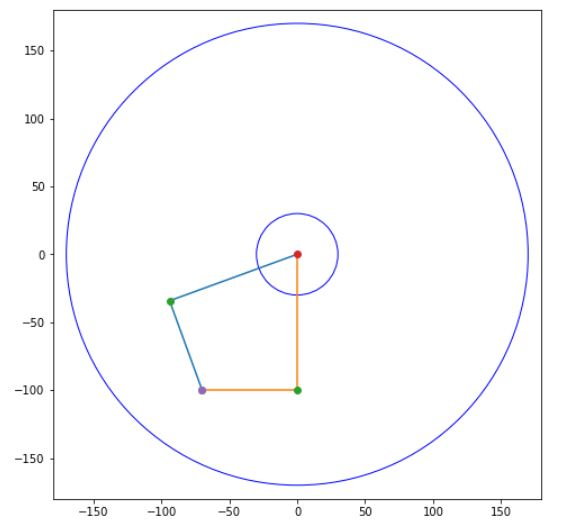

### Ex2

EX2: Write a function for the calculation of the jacobian (verify with S=[-70,-100] and length_arms=[100,70])

Ans: [[100.   ,       65.77181208]
 [-70.     ,     23.95973154]]

###Ex3

EX.3 Considering the following 5 trajectories (see plot) from point1 to point2, calculate the manipulability of each trajectories and choose the best one.

Ans: The trajectory with higher manipolability is 2

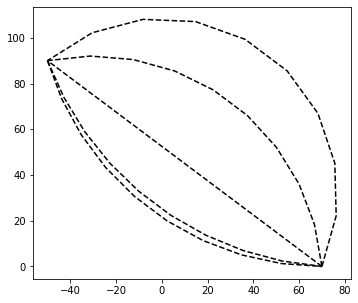

In [ ]:
def path1(A,B):
  x = np.linspace(A[0],B[0],10)
  m = (B[1]-A[1])/(B[0]-A[0])
  y = B[1]+m*(x-B[0])
  return x,y

def path2(A,B,x_center):
  m = -1/((A[1]-B[1])/(A[0]-B[0]))
  C = np.array([(A[0]+B[0])/2,(A[1]+B[1])/2])
  q = C[1]-m*C[0]
  y_center = m*x_center+q 
  r = np.sqrt(np.square(A[0]-x_center)+np.square(A[1]-y_center))
  base = np.sqrt(np.square(A[0]-B[0])+np.square(A[1]-B[1]))/2

  A0 = [A[0]-x_center,A[1]-y_center]
  B0 = [B[0]-x_center,B[1]-y_center]


  if A0[1]<=0:
    acosA = -np.arccos(A0[0]/r)
  if A0[1]>0:
    acosA = np.arccos(A0[0]/r)

  if B0[1]<=0:
    acosB = -np.arccos(B0[0]/r)
  if B0[1]>0:
    acosB = np.arccos(B0[0]/r)
  
  angle_i = min(acosA,acosB)
  angle_f = max(acosA,acosB)
  
  x_obs = x_center + r*np.cos(np.linspace(angle_i, angle_f, num=10))
  y_obs = y_center + r*np.sin(np.linspace(angle_i, angle_f, num=10))
  return x_obs, y_obs, 

point1 = np.array([70,0])
point2 = np.array([-50,90])

l = np.array([70,70])

#points trajectories:
x1,y1 = path1(point1,point2)
x2,y2= path2(point1,point2,0)
x3,y3= path2(point1,point2,70)
x4,y4= path2(point1,point2,-30)
x5,y5= path2(point1,point2,80)

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111, aspect='equal')
ax.plot(x1,y1,'--k')
ax.plot(x2,y2,'--k')
ax.plot(x3,y3,'--k')
ax.plot(x4,y4,'--k')
ax.plot(x5,y5,'--k')

plt.show()






### Ex4

EX4: Plot the Velocity Ellipses considering as trajectory the line y=0 (length_arms=[70,70]) 

Ans:

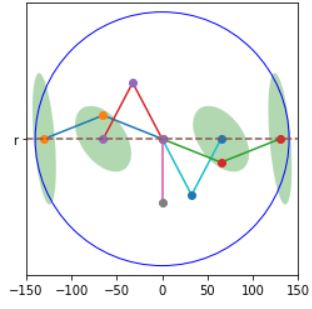

## **Scara Robot Dynamic**

### Ex1

EX1. Solve the inverse dynamic problem to obtain the torques during the movement of the gripper along a line from 𝑆𝑖=[0.2,0.5] to 𝑆𝑓=[−0.5,0.2].
Consider a cycloidal motion curve that takes 5s to complete the task under the following external forces, 𝐹𝑠𝑒=[1;1;0;0;0;0;0;0].

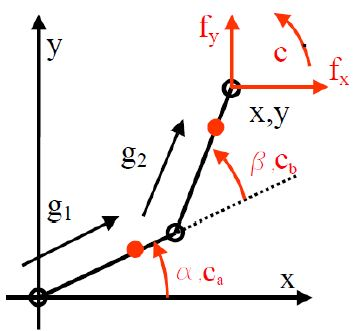

In [ ]:
def cycloidal(t,T,S0,dS):
    # cycloidal motion law
    """
    t time instant considered
    T time to comlete the movement
    S0 starting position
    dS total dispacement 
    
    assumption: Vini=Vfin=0"""

    ca=2*np.pi
    xpp=ca*np.sin(ca*t/T)*dS/T**2
    xp=(1-np.cos(ca*t/T))*dS/T
    x=S0+(t/T-np.sin(ca*t/T)/ca)*dS
    return x,xp,xpp

def exteded_jacobian(q,l,g1,g2):
    q1 = q[0]
    q2 = q[1]
    l1 = l[0]
    l2 = l[1]

    jacobian = np.array([[-l1*np.sin(q1)-l2*np.sin(q1+q2),-l2*np.sin(q1+q2)],
                        [ l1*np.cos(q1)+l2*np.cos(q1+q2), l2*np.cos(q1+q2)],
                        [-l1*np.sin(q1)-g2*np.sin(q1+q2),-g2*np.sin(q1+q2)],
                        [ l1*np.cos(q1)+g2*np.cos(q1+q2), g2*np.cos(q1+q2)],
                        [1,1],
                        [-g1*np.sin(q1),0],
                        [g1*np.cos(q1),0],
                        [1,0]])
    return jacobian

def exteded_jacobian_dot(q,q_dot,l,g1,g2):
    q1 = q[0]
    q2 = q[1]
    dq1 = q_dot[0]
    dq2 = q_dot[1]
    l1 = l[0]
    l2 = l[1]

    jacobian = np.array([[-dq1*l1*np.cos(q1)-(dq1+dq2)*l2*np.cos(q1+q2),-(dq1+dq2)*l2*np.cos(q1+q2)],
                         [-dq1*l1*np.sin(q1)-(dq1+dq2)*l2*np.sin(q1+q2),-(dq1+dq2)*l2*np.sin(q1+q2)],
                         [-dq1*l1*np.cos(q1)-(dq1+dq2)*g2*np.cos(q1+q2),-(dq1+dq2)*g2*np.cos(q1+q2)],
                         [-dq1*l1*np.sin(q1)-(dq1+dq2)*g2*np.sin(q1+q2),-(dq1+dq2)*g2*np.sin(q1+q2)],
                         [0,0],
                         [-dq1*g1*np.cos(q1),0],
                         [-dq1*g1*np.sin(q1),0],
                         [0,0]])
    return jacobian



#2D Robot moving a payload and subjected to a constant external force
#link1
l1 = 0.33 #m
g1 = 0.28 #m COM
m1 = 7.8 #kg
J1_z = 0.0565 #kg*m^2

#link2
l2 = 0.33 #m
g2 = 0.283 #m COM
m2 = 7 #kg
J2_z = 0.0565 #kg*m^2

#payload
M = 0.5 #kg

M_matrix = np.diag([M,M,m2,m2,(J1_z+J2_z),m1,m1,J1_z])

#Trajectory data
T = 5 #total movement time 
n = 100 # of points of the Mot.Law
dT = T/(n-1)


Si=np.array([0.2, 0.5]) #start point
Sf=np.array([-0.5, 0.2]) #end point









Ans:

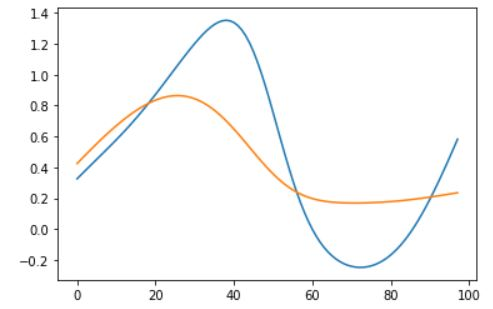